<a href="https://colab.research.google.com/github/lynnkuan/python/blob/main/2330%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%9B%9E%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl,plt

In [85]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='sans-serif'

os.environ['PYTHONHASHSEED']='0'

<ipython-input-85-1ca1ff914c40>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [86]:
x = np.linspace(0,10)
def set_seeds(seed=100):
  random.seed(seed)
  np.random.seed(seed)
set_seeds()

[0.94612934 0.22855261]


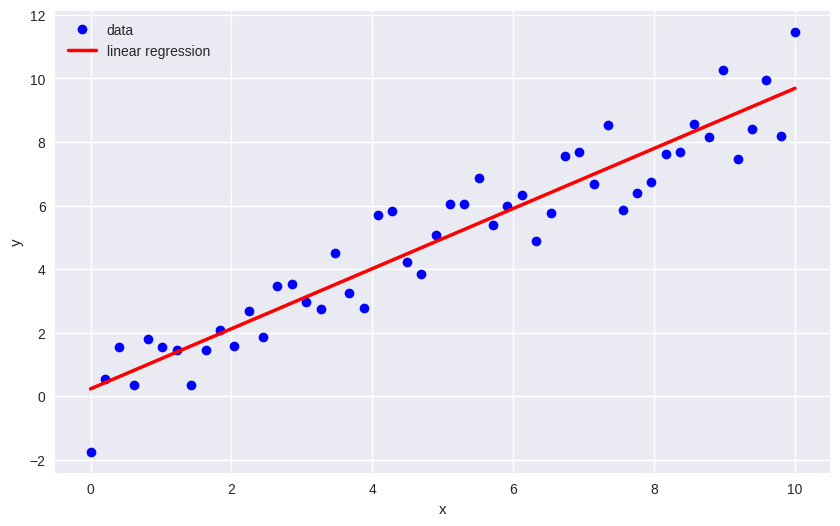

In [87]:
y = x + np.random.standard_normal(len(x))
reg = np.polyfit(x,y,deg=1)
print(reg)

plt.figure(figsize=(10,6))
plt.plot(x,y,'bo',label='data')
plt.plot(x,np.polyval(reg,x),'r',lw=2.5,label='linear regression')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

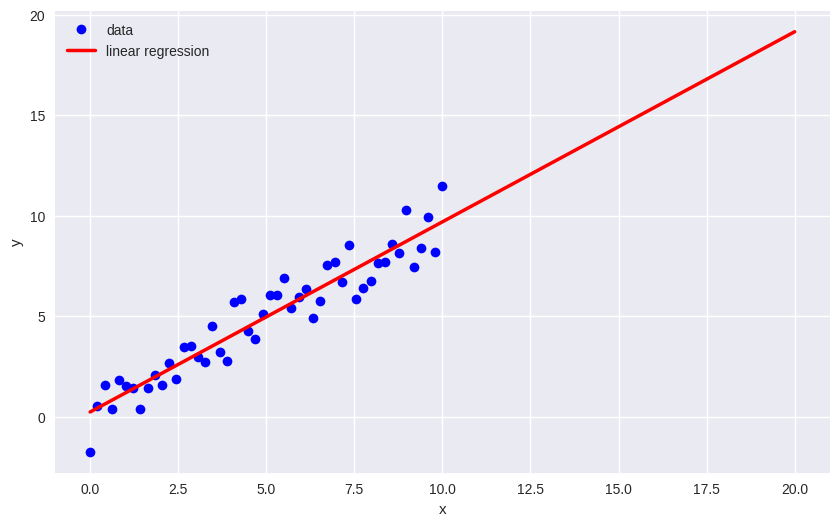

In [88]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'bo',label='data')
xn = np.linspace(0,20)
plt.plot(xn,np.polyval(reg,xn),'r',lw=2.5,label='linear regression')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [89]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
lags=3
m = np.zeros((lags+1,len(x)-lags))
m[lags] = x[lags:]
for i in range(lags):
  m[i] = x[i:i-lags]

m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [91]:
reg = np.linalg.lstsq(m[:lags].T,m[lags],rcond=None)[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [92]:
np.dot(m[:lags].T,reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [93]:
data = pd.read_csv('2330TEJ.csv')
data

,date,1M_high,3M_high,6M_high,9M_high,1Y_high,1M_low,3M_low,6M_low,9M_low,...,SMA_750d,SMA_1250d,SMA_2500d,vol_55d_max,vol_65d_max,vol_240d_max,extra_1,extra_2,extra_3,extra_4
0,2024-10-18,1085.0,1085.0000,1085.0000,1085.0000,1085.0000,957.0,811.3724,735.8533,617.9290,...,4.711156e+07,4.674301e+07,4.313762e+07,3.363233e+07,2.272338e+07,2.140464e+07,1.384897e+07,159662.795,159662.795,176166.037
1,2024-10-17,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,580.4189,...,4.639698e+07,4.573941e+07,4.268644e+07,3.328967e+07,2.260421e+07,2.132834e+07,1.381084e+07,159662.795,159662.795,176166.037
2,2024-10-16,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,573.5092,...,4.631153e+07,4.520412e+07,4.248195e+07,3.311630e+07,2.253870e+07,2.129197e+07,1.379059e+07,159662.795,159662.795,176166.037
3,2024-10-15,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,...,4.620621e+07,4.490201e+07,4.218943e+07,3.290072e+07,2.246822e+07,2.124772e+07,1.376794e+07,159662.795,159662.795,176166.037
4,2024-10-14,1045.0,1050.3042,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,...,4.607861e+07,4.467899e+07,4.192664e+07,3.273591e+07,2.241006e+07,2.120631e+07,1.374866e+07,159662.795,159662.795,176166.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2023-08-01,591.0,591.0000,591.0000,591.0000,591.0000,558.0,493.1905,489.2091,376.0088,...,1.536031e+07,1.523271e+07,1.548562e+07,1.592132e+07,2.008431e+07,1.613632e+07,1.072986e+07,104924.623,104924.623,148413.161
296,2023-07-31,591.0,591.0000,591.0000,591.0000,591.0000,558.0,493.1905,489.2091,376.0088,...,1.545423e+07,1.519641e+07,1.555652e+07,1.595179e+07,2.009563e+07,1.613679e+07,1.072766e+07,104924.623,104924.623,148413.161
297,2023-07-28,591.0,591.0000,591.0000,591.0000,591.0000,558.0,493.1905,489.2091,376.0088,...,1.545899e+07,1.510224e+07,1.575707e+07,1.592786e+07,2.009861e+07,1.613069e+07,1.072258e+07,104924.623,104924.623,148413.161
298,2023-07-27,591.0,591.0000,591.0000,591.0000,591.0000,558.0,493.1905,489.2091,373.5480,...,1.560793e+07,1.510394e+07,1.575777e+07,1.596518e+07,2.010035e+07,1.612869e+07,1.071954e+07,104924.623,104924.623,148413.161


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          300 non-null    object 
 1   1M_high       300 non-null    float64
 2   3M_high       300 non-null    float64
 3   6M_high       300 non-null    float64
 4   9M_high       300 non-null    float64
 5   1Y_high       300 non-null    float64
 6   1M_low        300 non-null    float64
 7   3M_low        300 non-null    float64
 8   6M_low        300 non-null    float64
 9   9M_low        300 non-null    float64
 10  55d_SMA       300 non-null    float64
 11  65d_SMA       300 non-null    int64  
 12  72d_SMA       300 non-null    float64
 13  125d_SMA      300 non-null    float64
 14  250d_SMA      300 non-null    float64
 15  750d_SMA      300 non-null    float64
 16  1250d_SMA     300 non-null    float64
 17  2500d_SMA     300 non-null    float64
 18  vol_55d       300 non-null    

In [95]:
data.describe()

,1M_high,3M_high,6M_high,9M_high,1Y_high,1M_low,3M_low,6M_low,9M_low,55d_SMA,...,SMA_750d,SMA_1250d,SMA_2500d,vol_55d_max,vol_65d_max,vol_240d_max,extra_1,extra_2,extra_3,extra_4
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000
mean,764.418491,779.95694,781.941159,781.941159,781.941159,682.643483,622.719911,555.323229,500.985488,459.194363,...,2.710965e+07,2.669674e+07,2.390098e+07,2.006811e+07,1.984124e+07,1.788786e+07,1.185642e+07,118221.377080,122597.641907,164734.905633
std,188.110688,199.20108,197.695743,197.695743,197.695743,142.302705,116.179868,78.606425,42.494866,57.584580,...,1.292213e+07,1.259346e+07,1.061330e+07,5.726964e+06,1.039287e+06,1.639876e+06,9.622376e+05,47901.402061,47171.903970,14055.668949
min,553.000000,560.87260,584.667300,584.667300,584.667300,519.000000,491.199800,486.496500,373.548000,363.156600,...,1.221659e+07,1.240046e+07,1.355566e+07,1.482940e+07,1.877754e+07,1.612824e+07,1.071742e+07,52275.128000,52275.128000,104924.623000
25%,585.000000,591.00000,591.000000,591.000000,591.000000,541.000000,519.000000,490.455700,483.966800,436.498625,...,1.519103e+07,1.509005e+07,1.424153e+07,1.579876e+07,1.913647e+07,1.642030e+07,1.098429e+07,61670.562000,61670.562000,148413.161000
50%,780.356000,780.35600,780.356000,780.356000,780.356000,677.917350,572.169300,519.000000,512.909300,483.966800,...,2.635451e+07,2.510150e+07,2.038445e+07,1.717176e+07,1.937054e+07,1.741871e+07,1.163733e+07,143868.560000,143868.560000,176166.037000
75%,973.000000,981.00000,981.000000,981.000000,981.000000,815.000000,739.143300,571.114900,516.301700,511.923000,...,3.620242e+07,3.580023e+07,3.328704e+07,2.358328e+07,2.007428e+07,1.916960e+07,1.260430e+07,159662.795000,159662.795000,176166.037000
max,1085.000000,1085.00000,1085.000000,1085.000000,1085.000000,957.000000,815.000000,739.143300,617.929000,518.482800,...,4.930684e+07,4.796410e+07,4.313762e+07,3.363233e+07,2.272338e+07,2.140464e+07,1.384897e+07,176166.037000,176166.037000,176166.037000


In [96]:
price = '65d_SMA'
data = data.iloc[::-1].reset_index(drop=True)
data.set_index('date', inplace=True)

data1 = pd.DataFrame(data[price])
data1.rename(columns={price:'price'},inplace=True)
data1

,price
date,
2023-07-26,566
2023-07-27,569
2023-07-28,567
2023-07-31,565
2023-08-01,567
...,...
2024-10-14,1045
2024-10-15,1070
2024-10-16,1045


In [97]:
lags = 5
cols =[]
for lag in range(1,lags+1):
  col = f'lag_{lag}'
  data1[col] = data1['price'].shift(lag)
  cols.append(col)
data1.dropna(inplace=True)
data1

,price,lag_1,lag_2,lag_3,lag_4,lag_5
date,,,,,,
2023-08-02,561,567.0,565.0,567.0,569.0,566.0
2023-08-04,554,561.0,567.0,565.0,567.0,569.0
2023-08-07,558,554.0,561.0,567.0,565.0,567.0
2023-08-08,552,558.0,554.0,561.0,567.0,565.0
2023-08-09,554,552.0,558.0,554.0,561.0,567.0
...,...,...,...,...,...,...
2024-10-14,1045,1045.0,1020.0,1010.0,1005.0,977.0
2024-10-15,1070,1045.0,1045.0,1020.0,1010.0,1005.0
2024-10-16,1045,1070.0,1045.0,1045.0,1020.0,1010.0


In [98]:
reg = np.linalg.lstsq(data1[cols],data1['price'],rcond=None)[0]
reg

array([ 0.95044771, -0.13149263,  0.30209812, -0.18677804,  0.06843706])

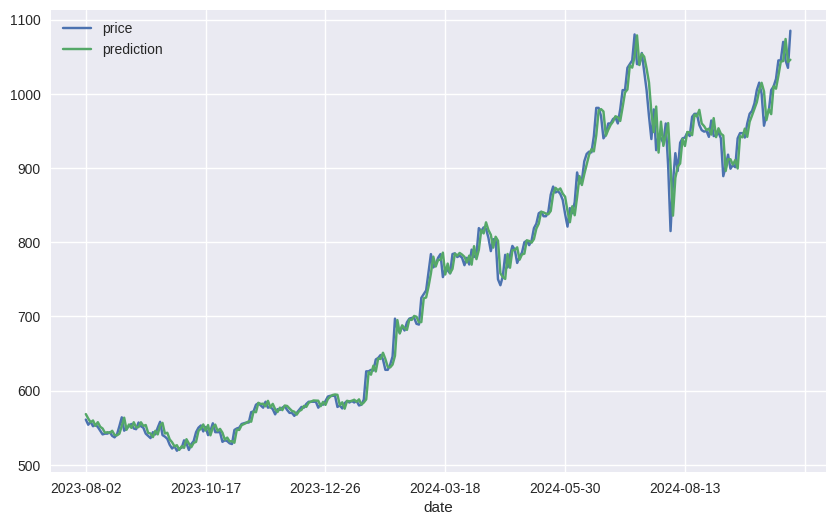

In [99]:
data1['prediction'] = np.dot(data1[cols],reg)
data1[['price','prediction']].plot(figsize=(10,6))
plt.show()

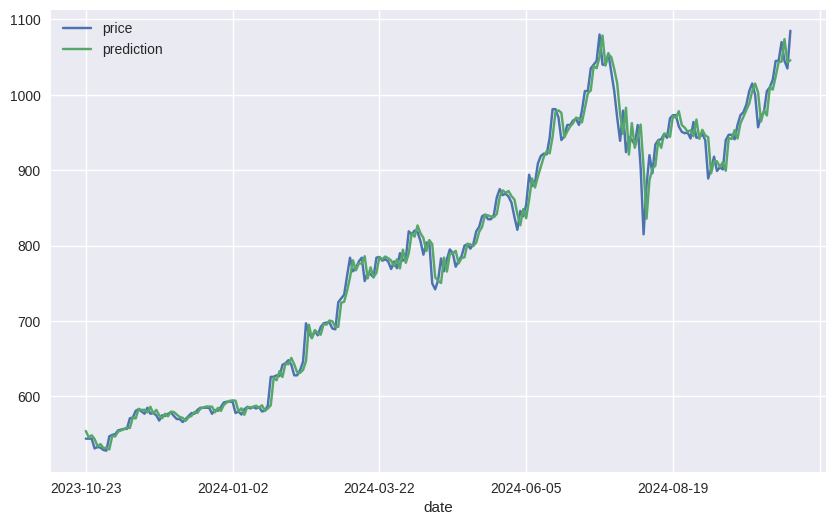

In [100]:
data1[['price','prediction']].loc['2023-10-22':].plot(figsize=(10,6))
plt.show()

In [101]:
data1['return'] = np.log(data1['price']/data1['price'].shift(1))
data1.dropna(inplace=True)
data1

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
date,,,,,,,,
2023-08-04,554,561.0,567.0,565.0,567.0,569.0,562.367819,-0.012556
2023-08-07,558,554.0,561.0,567.0,565.0,567.0,557.344519,0.007194
2023-08-08,552,558.0,554.0,561.0,567.0,565.0,559.743739,-0.010811
2023-08-09,554,552.0,558.0,554.0,561.0,567.0,552.657938,0.003617
2023-08-10,551,554.0,552.0,558.0,554.0,561.0,557.453006,-0.005430
...,...,...,...,...,...,...,...,...
2024-10-14,1045,1045.0,1020.0,1010.0,1005.0,977.0,1043.365550,0.000000
2024-10-15,1070,1045.0,1045.0,1020.0,1010.0,1005.0,1044.081563,0.023642
2024-10-16,1045,1070.0,1045.0,1045.0,1020.0,1010.0,1073.869614,-0.023642


[-0.0317803  -0.16365528  0.12518902 -0.04573241  0.05000246]


<Axes: xlabel='date'>

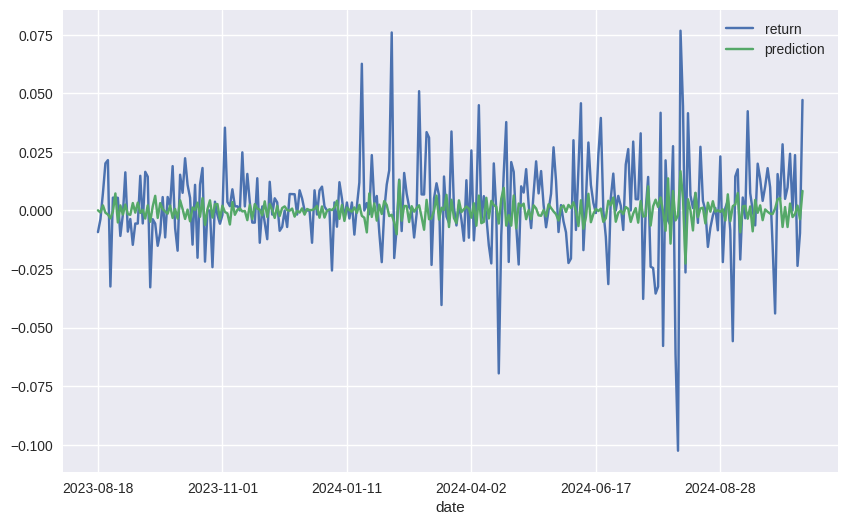

In [102]:
cols = []

for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data1[col] = data1['return'].shift(lag)
    cols.append(col)

data1.dropna(inplace=True)

reg = np.linalg.lstsq(data1[cols], data1['return'], rcond=None)[0]
print(reg)

data1['prediction'] = np.dot(data1[cols], reg)
data1[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6))


In [103]:
hits = np.sign(data1['return']*data1['prediction']).value_counts()
print(hits)

hits.values[0]/sum(hits)

 1.0    136
-1.0    131
 0.0     22
Name: count, dtype: int64


0.47058823529411764

In [104]:
reg = np.linalg.lstsq(data1[cols], data1['return'], rcond=None)[0]
print(reg)

data1['prediction'] = np.dot(data1[cols], reg)
data1['prediction'].value_counts()

[-0.0317803  -0.16365528  0.12518902 -0.04573241  0.05000246]


,count
prediction,
-0.002730,1
0.006672,1
-0.000212,1
0.003483,1
0.001091,1
...,...
-0.003024,1
0.001719,1
-0.003081,1


In [105]:
hits = np.sign(data1['return']*data1['prediction']).value_counts()
print(hits)

hits.values[0]/sum(hits)

 1.0    136
-1.0    131
 0.0     22
Name: count, dtype: int64


0.47058823529411764

In [106]:
data1.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
date,,,,,,,,
2023-08-11,546,-0.005430,0.003617,-0.010811,0.007194,-0.012556,-0.002730,-0.009116
2023-08-14,541,-0.009116,-0.005430,0.003617,-0.010811,0.007194,0.002485,-0.009200
2023-08-15,542,-0.009200,-0.009116,-0.005430,0.003617,-0.010811,0.000398,0.001847
2023-08-16,542,0.001847,-0.009200,-0.009116,-0.005430,0.003617,0.000735,0.000000
2023-08-17,544,0.000000,0.001847,-0.009200,-0.009116,-0.005430,-0.001309,0.003683


In [107]:
data1['strategy'] = data1['prediction']*data1['return']
data1[['return','strategy']].sum().apply(np.exp)

,0
return,1.969147
strategy,1.005240


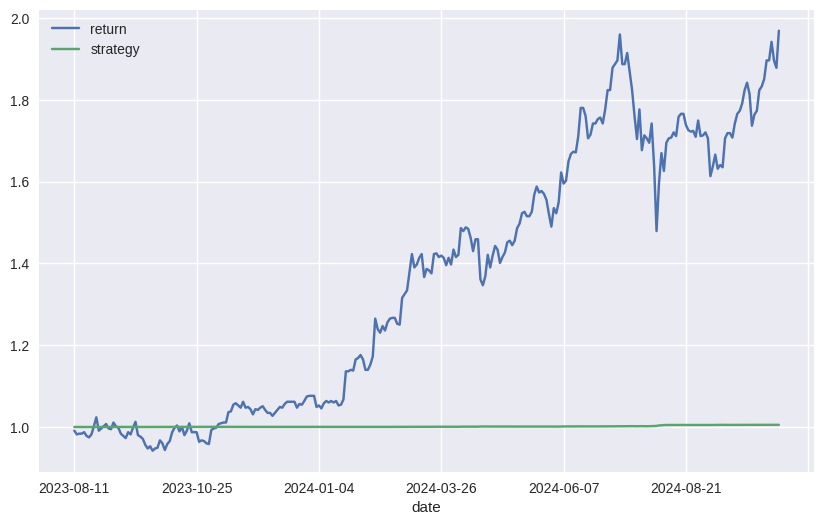

In [108]:
data1[['return','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
plt.show()

In [109]:
#scikit-learn
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [110]:
x = np.arange(12)
lags=3

m = np.zeros((lags+1,len(x)-lags))
m[lags] = x[lags:]
for i in range(lags):
  m[i] = x[i:i-lags]

In [111]:
lm = linear_model.LinearRegression()
lm.fit(m[:lags].T,m[lags])
print(lm.coef_)
print(lm.intercept_)

lm.predict(m[:lags].T)

[0.33333333 0.33333333 0.33333333]
2.0


array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [112]:
#不使用intercept
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(m[:lags].T,m[lags])
print(lm.coef_)
print(lm.intercept_)

lm.predict(m[:lags].T)

[-0.66666667  0.33333333  1.33333333]
0.0


array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [113]:
#分類問題預測市場動向
data1.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy
date,,,,,,,,,
2023-08-11,546,-0.005430,0.003617,-0.010811,0.007194,-0.012556,-0.002730,-0.009116,2.488240e-05
2023-08-14,541,-0.009116,-0.005430,0.003617,-0.010811,0.007194,0.002485,-0.009200,-2.286342e-05
2023-08-15,542,-0.009200,-0.009116,-0.005430,0.003617,-0.010811,0.000398,0.001847,7.359048e-07
2023-08-16,542,0.001847,-0.009200,-0.009116,-0.005430,0.003617,0.000735,0.000000,0.000000e+00
2023-08-17,544,0.000000,0.001847,-0.009200,-0.009116,-0.005430,-0.001309,0.003683,-4.819693e-06


In [114]:
lm1 = linear_model.LogisticRegression(C=1e7,solver='lbfgs',
                                    multi_class='auto',
                                    max_iter=1000)
lm1.fit(data1[cols],np.sign(data1['return']))
data1['prediction'] = lm1.predict(data1[cols])
data1['prediction'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,count
prediction,
1.0,264
-1.0,25


 1.0    158
-1.0    106
 0.0     22
Name: count, dtype: int64


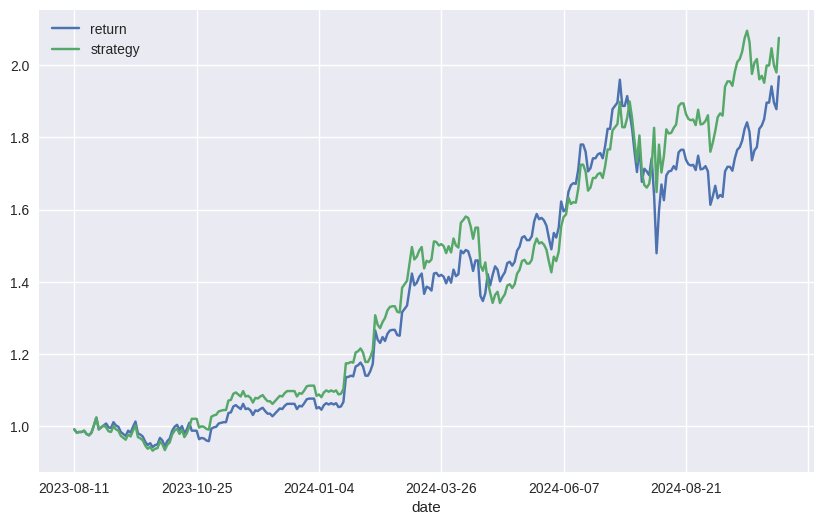

In [115]:
hits = np.sign(data1['return'].iloc[lags:]*data1['prediction'].iloc[lags:]).value_counts()
print(hits)

accuracy_score(data1['prediction'],np.sign(data1['return']))
data1['strategy'] = data1['prediction']*data1['return']
data1[['return','strategy']].sum().apply(np.exp)

data1[['return','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
plt.show()

深度學習預測市場動向

In [116]:
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop

In [117]:
#practice
hours = np.array([0.5,0.75,1.,1.25,1.5,1.75,2.,
                  2.25,2.5,2.75,3.,3.25,3.5,4.,4.25,
                  4.5,4.75,5.,5.5])

success = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,
                    0,1,1,1,1,1])

data = pd.DataFrame({'hours':hours,'success':success})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hours    19 non-null     float64
 1   success  19 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 432.0 bytes


In [118]:
model = MLPClassifier(hidden_layer_sizes=(32),
                      max_iter=1000,
                      random_state=100)
model.fit(data['hours'].values.reshape(-1,1),data['success'])

data['prediction'] = model.predict(data['hours'].values.reshape(-1,1))
data['prediction'].value_counts()

data

,hours,success,prediction
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,2.00,1,0
7,2.25,0,0
8,2.50,1,0
9,2.75,0,0


<Axes: xlabel='hours'>

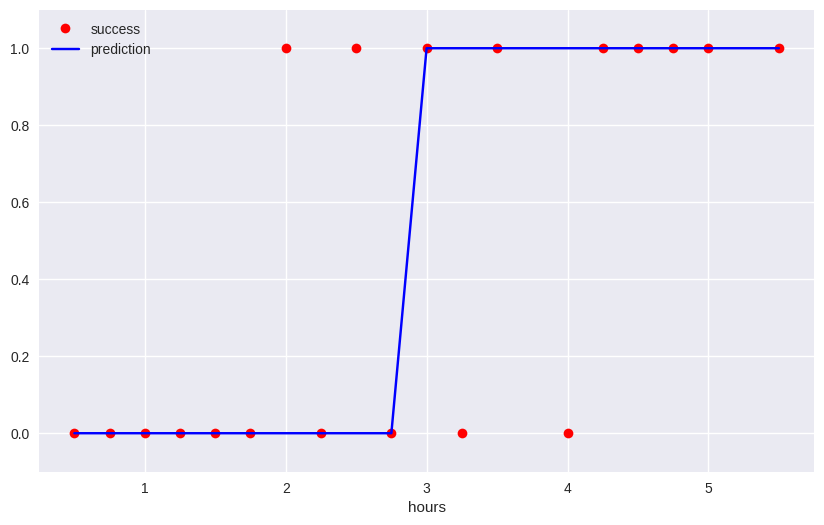

In [119]:
data.plot(x='hours',y=['success','prediction'],
          style=['ro','b-'],ylim=[-.1,1.1],
          figsize=(10,6))

In [120]:
data1

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy
date,,,,,,,,,
2023-08-11,546,-0.005430,0.003617,-0.010811,0.007194,-0.012556,1.0,-0.009116,-0.009116
2023-08-14,541,-0.009116,-0.005430,0.003617,-0.010811,0.007194,1.0,-0.009200,-0.009200
2023-08-15,542,-0.009200,-0.009116,-0.005430,0.003617,-0.010811,1.0,0.001847,0.001847
2023-08-16,542,0.001847,-0.009200,-0.009116,-0.005430,0.003617,1.0,0.000000,0.000000
2023-08-17,544,0.000000,0.001847,-0.009200,-0.009116,-0.005430,1.0,0.003683,0.003683
...,...,...,...,...,...,...,...,...,...
2024-10-14,1045,0.024214,0.009852,0.004963,0.028256,0.005131,1.0,0.000000,0.000000
2024-10-15,1070,0.000000,0.024214,0.009852,0.004963,0.028256,1.0,0.023642,0.023642
2024-10-16,1045,0.023642,0.000000,0.024214,0.009852,0.004963,1.0,-0.023642,-0.023642


In [121]:
data1['direction'] = np.where(data1['return']>0,1,0)
data1['direction']

,direction
date,
2023-08-11,0
2023-08-14,0
2023-08-15,1
2023-08-16,0
2023-08-17,1
...,...
2024-10-14,0
2024-10-15,1
2024-10-16,0


In [122]:
optimizer = Adam(learning_rate=0.0001)
def set_seeds(seed=100):
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(100)

set_seeds()

In [123]:
lags = 5
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
cutoff = '2023-10-22'

training_data = data1[data1.index<cutoff].copy()
mu,std = training_data.mean(),training_data.std()

training_data_norm = (training_data-mu)/std       #高斯歸ㄧ化
print(mu,std)

training_data

price         541.541667
lag_1          -0.000303
lag_2          -0.000458
lag_3          -0.000263
lag_4          -0.000341
lag_5          -0.000299
prediction      0.958333
return          0.000188
strategy       -0.000038
direction       0.500000
dtype: float64 price         10.921301
lag_1          0.013055
lag_2          0.012961
lag_3          0.012726
lag_4          0.012667
lag_5          0.012623
prediction     0.288675
return         0.013299
strategy       0.013300
direction      0.505291
dtype: float64


,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy,direction
date,,,,,,,,,,
2023-08-11,546,-0.005430,0.003617,-0.010811,0.007194,-0.012556,1.0,-0.009116,-0.009116,0
2023-08-14,541,-0.009116,-0.005430,0.003617,-0.010811,0.007194,1.0,-0.009200,-0.009200,0
2023-08-15,542,-0.009200,-0.009116,-0.005430,0.003617,-0.010811,1.0,0.001847,0.001847,1
2023-08-16,542,0.001847,-0.009200,-0.009116,-0.005430,0.003617,1.0,0.000000,0.000000,0
2023-08-17,544,0.000000,0.001847,-0.009200,-0.009116,-0.005430,1.0,0.003683,0.003683,1
2023-08-18,539,0.003683,0.000000,0.001847,-0.009200,-0.009116,1.0,-0.009234,-0.009234,0
2023-08-21,537,-0.009234,0.003683,0.000000,0.001847,-0.009200,1.0,-0.003717,-0.003717,0
2023-08-22,541,-0.003717,-0.009234,0.003683,0.000000,0.001847,1.0,0.007421,0.007421,1
2023-08-23,552,0.007421,-0.003717,-0.009234,0.003683,0.000000,1.0,0.020129,0.020129,1


In [125]:
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50,verbose=False,
          validation_split=0.2,
          shuffle=False)

In [126]:
testing_data = data1[data1.index>cutoff].copy()
mu,std = testing_data.mean(),testing_data.std()

testing_data_norm = (testing_data-mu)/std       #高斯歸ㄧ化
print(mu,std)

testing_data

price         787.585062
lag_1           0.002654
lag_2           0.002739
lag_3           0.002754
lag_4           0.002701
lag_5           0.002641
prediction      0.800830
return          0.002774
strategy        0.003038
direction       0.551867
dtype: float64 price         164.140927
lag_1           0.020846
lag_2           0.020838
lag_3           0.020820
lag_4           0.020783
lag_5           0.020812
prediction      0.600138
return          0.021019
strategy        0.020982
direction       0.498337
dtype: float64


,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy,direction
date,,,,,,,,,,
2023-10-23,544,0.018149,0.011050,-0.020166,0.010949,-0.014572,-1.0,-0.021819,0.021819,0
2023-10-24,544,-0.021819,0.018149,0.011050,-0.020166,0.010949,1.0,0.000000,0.000000,0
2023-10-25,544,0.000000,-0.021819,0.018149,0.011050,-0.020166,1.0,0.000000,0.000000,0
2023-10-26,531,0.000000,0.000000,-0.021819,0.018149,0.011050,1.0,-0.024187,-0.024187,0
2023-10-27,533,-0.024187,0.000000,0.000000,-0.021819,0.018149,1.0,0.003759,0.003759,1
...,...,...,...,...,...,...,...,...,...,...
2024-10-14,1045,0.024214,0.009852,0.004963,0.028256,0.005131,1.0,0.000000,0.000000,0
2024-10-15,1070,0.000000,0.024214,0.009852,0.004963,0.028256,1.0,0.023642,0.023642,1
2024-10-16,1045,0.023642,0.000000,0.024214,0.009852,0.004963,1.0,-0.023642,-0.023642,0


<Axes: >

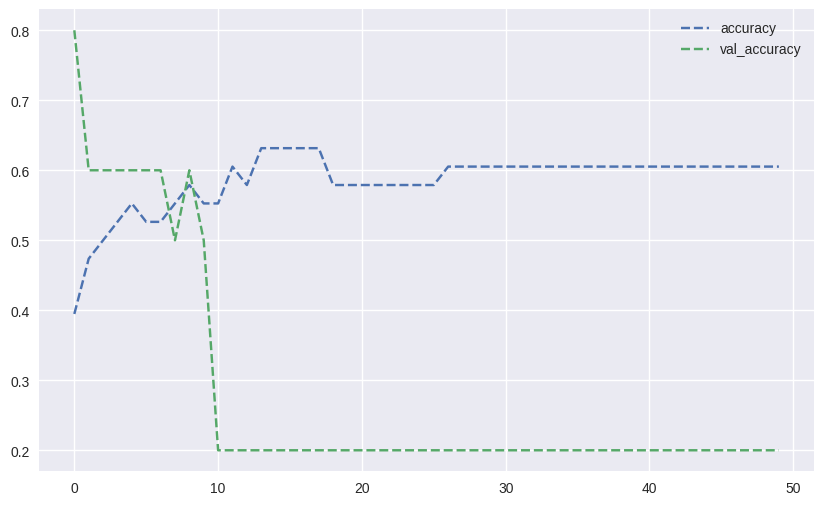

In [127]:
res = pd.DataFrame(model.history.history)
res[['accuracy','val_accuracy']].plot(figsize=(10,6),style='--')

In [128]:
model.evaluate(training_data_norm[cols],training_data['direction'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6007 - loss: 0.6882


[0.6817626953125, 0.6041666865348816]

In [129]:
pred = np.where(model.predict(training_data_norm[cols])>0.5,1,0)
pred[:30].flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1])

In [130]:
training_data['prediction'] = np.where(pred>0,1,-1)
training_data['strategy'] = (training_data['prediction']*training_data['return'])
training_data[['return','strategy']].sum().apply(np.exp)

,0
return,1.009074
strategy,1.034688


<Axes: xlabel='date'>

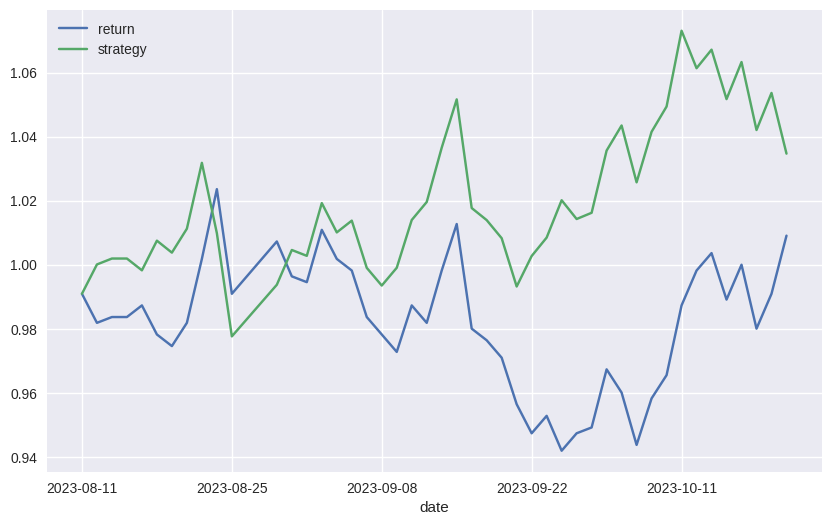

In [131]:
training_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [135]:
#testing data evaluation
model.evaluate(testing_data_norm[cols],testing_data['direction'])     #accurarcy低

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5260 - loss: 0.7055 


[0.706055760383606, 0.5269709825515747]

In [136]:
pred = np.where(model.predict(testing_data_norm[cols])>0.5,1,0)

testing_data['prediction'] = np.where(pred>0,1,-1)
testing_data['strategy'] = (testing_data['prediction']*testing_data['return'])

testing_data[['return','strategy']].sum().apply(np.exp)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,0
return,1.951439
strategy,1.421315


<Axes: xlabel='date'>

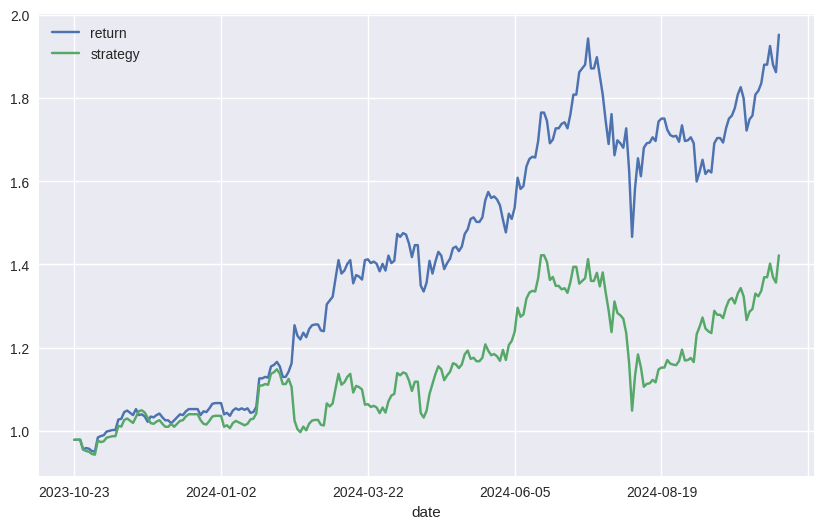

In [137]:
testing_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [150]:
#添加其他特徵值
data1['momentum'] = data1['return'].rolling(5).mean().shift(1)
data1['volatility'] = data1['return'].rolling(20).std().shift(1)
data1['distance'] = (data1['price']-data1['price'].rolling(50).mean()).shift(1)
data1.dropna(inplace=True)

cols.extend(['momentum','volatility','distance'])
data1

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy,direction,momentum,volatility,distance
date,,,,,,,,,,,,,
2024-01-04,580,-0.025621,0.000000,0.000000,0.001688,0.010187,1.0,0.003454,0.003454,1,-0.002749,0.008565,8.08
2024-01-05,576,0.003454,-0.025621,0.000000,0.000000,0.001688,1.0,-0.006920,-0.006920,0,-0.004096,0.008585,9.36
2024-01-08,583,-0.006920,0.003454,-0.025621,0.000000,0.000000,1.0,0.012080,0.012080,1,-0.005817,0.008580,4.46
2024-01-09,586,0.012080,-0.006920,0.003454,-0.025621,0.000000,1.0,0.005133,0.005133,1,-0.003401,0.008840,10.46
2024-01-10,584,0.005133,0.012080,-0.006920,0.003454,-0.025621,1.0,-0.003419,-0.003419,0,-0.002375,0.008785,12.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-14,1045,0.024214,0.009852,0.004963,0.028256,0.005131,1.0,0.000000,0.000000,0,0.014483,0.017553,96.02
2024-10-15,1070,0.000000,0.024214,0.009852,0.004963,0.028256,1.0,0.023642,0.023642,1,0.013457,0.017630,93.92
2024-10-16,1045,0.023642,0.000000,0.024214,0.009852,0.004963,1.0,-0.023642,-0.023642,0,0.012534,0.017809,116.20


In [154]:
#redefine train-test data
training_data = data1[data1.index<cutoff].copy()
train_mu,train_std = training_data.mean(),training_data.std()

training_data_norm = (training_data-mu)/std       #高斯歸ㄧ化

testing_data = data1[data1.index>cutoff].copy()
test_mu,test_std = testing_data.mean(),testing_data.std()

testing_data_norm = (testing_data-mu)/std
print('train_mu=',train_mu,'train_std',train_std)
print('test_mu=',train_mu,'test_std',train_std)

train_mu= price        NaN
lag_1        NaN
lag_2        NaN
lag_3        NaN
lag_4        NaN
lag_5        NaN
prediction   NaN
return       NaN
strategy     NaN
direction    NaN
momentum     NaN
volatility   NaN
distance     NaN
dtype: float64 train_std price        NaN
lag_1        NaN
lag_2        NaN
lag_3        NaN
lag_4        NaN
lag_5        NaN
prediction   NaN
return       NaN
strategy     NaN
direction    NaN
momentum     NaN
volatility   NaN
distance     NaN
dtype: float64
test_mu= price        NaN
lag_1        NaN
lag_2        NaN
lag_3        NaN
lag_4        NaN
lag_5        NaN
prediction   NaN
return       NaN
strategy     NaN
direction    NaN
momentum     NaN
volatility   NaN
distance     NaN
dtype: float64 test_std price        NaN
lag_1        NaN
lag_2        NaN
lag_3        NaN
lag_4        NaN
lag_5        NaN
prediction   NaN
return       NaN
strategy     NaN
direction    NaN
momentum     NaN
volatility   NaN
distance     NaN
dtype: float64


In [153]:
set_seeds()
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(len(cols),)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(training_data_norm[cols], training_data['direction'],
          verbose=False, epochs=25)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unknown variable: <KerasVariable shape=(6, 64), dtype=float32, path=sequential_8/dense_24/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [143]:


model.fit(training_data_norm[cols],trainging_data['direction'],
          verbose=False,epochs=25)

KeyError: "['momentum', 'volatility', 'distance'] not in index"